# 10 minutes to pandas
- Customarliy, we import as follows :

In [ ]:
import numpy as np
import pandas as pd

# Object creation
- Creating a Series by passing a list of values, letting pandas create a default integer index:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- Creating a DataFrame by passing a NumPy array, with a datetime index using date_range() and labeled columns:

In [ ]:
import pandas as pd
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
import numpy as np
import pandas as pd

dates = pd.date_range("20130101", periods=6)
dates

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.816177,-0.130585,-0.018538,-0.746374
2013-01-02,0.597863,-0.514111,-0.471228,1.165780
2013-01-03,-0.378945,-0.270550,0.230012,0.756702
2013-01-04,-0.364879,1.258204,-0.346624,-1.247807
2013-01-05,-0.388529,-0.140601,-0.145775,-0.256516
2013-01-06,0.523016,-1.201388,-1.056500,-0.246510


- Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure:

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


- The columns of the resulting DataFrame have difficult dtypes:

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

- If you're using IPython, tab completion for column names(as well as public attributes)is automatically enalbed. Here's a subset of the attributes that will be completed:

In [ ]:
import numpy as np
import pandas as pd

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2.<TAB>  # noqa: E225, E999

SyntaxError: ignored

As you can see, the columns A,B,C and D are automatically tab completed. E and F are there as well; the rest of the attributes have been truncated for brevity.

# Viewing data
- Using DataFrame.head() and DataFrame.tail() to view the top and bottom rows of the frame respectively:


In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.head()

,A,B,C,D
2013-01-01,0.320002,-0.179920,1.051236,-2.048991
2013-01-02,1.965374,-0.533520,1.416108,0.448719
2013-01-03,2.644537,-2.097475,-1.023169,-0.818968
2013-01-04,-1.380171,-0.122267,0.198955,-0.891015
2013-01-05,-1.428731,0.210362,1.187684,0.942659


In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df.tail(3)

,A,B,C,D
2013-01-04,-1.380171,-0.122267,0.198955,-0.891015
2013-01-05,-1.428731,0.210362,1.187684,0.942659
2013-01-06,-1.149317,-0.157435,-0.912643,0.475591


- Display the DataFrame.index or DataFrame.columns:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.** When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.For df, our DataFrame of all floating-point values, and DataFrame.to_numpy() is fast and doesn’t require copying data:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.to_numpy()

array([[-1.30315354, -0.71103853,  1.21939031, -0.88847245],
       [-0.13877163,  0.02295904,  1.2776143 ,  0.99972205],
       [ 1.48678457,  0.80656198, -0.11067681,  0.18896053],
       [ 1.05061297,  1.70901282, -0.45418019, -1.44777812],
       [ 0.79541014,  0.99261349,  0.44264792,  0.67275415],
       [ 0.58053895, -1.6755079 ,  0.99649932, -0.1346573 ]])

### Note
DataFrame.to_numpy() does not include the index or column labels in the output.

- describe() shows a quick static summary of your data:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.439192,-0.247509,-0.074649,0.082466
std,0.538984,2.011711,0.946271,0.949192
min,-1.301296,-2.145922,-1.381855,-0.721813
25%,-0.635317,-1.898188,-0.604215,-0.617034
50%,-0.436238,-0.735779,-0.004624,-0.237096
75%,-0.108503,1.081993,0.280042,0.477822
max,0.239556,2.730169,1.372360,1.718354


- Transposing your data:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.353001,1.172587,-0.015255,1.210108,0.371900,1.487840
B,-1.415374,-0.126557,-0.460604,-0.539922,-0.761251,0.283071
C,1.527044,0.011843,-0.601529,0.786848,0.938613,0.224950
D,-0.306425,2.752312,-0.787757,0.786324,-0.735714,-0.198612


- DataFrame.sort_index() sorts by an axis:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.sort_index(axis=1, ascending=False) # axis=0 --> row, axis=1 --> column

,D,C,B,A
2013-01-01,-0.399173,-1.527724,-0.430953,-0.755992
2013-01-02,-0.581572,0.172563,0.592295,-0.217359
2013-01-03,-0.484574,1.357255,-0.545396,1.249954
2013-01-04,0.170923,0.496152,0.444388,0.442805
2013-01-05,0.644112,-0.121578,-0.755995,0.030569
2013-01-06,0.727280,0.153174,2.202010,-0.931077


- DataFrame.sort_value() sorts by values:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.sort_values(by="B")

,A,B,C,D
2013-01-03,-0.765452,-1.106153,-0.074765,-0.640402
2013-01-06,1.093264,-0.789279,0.161506,-0.586255
2013-01-01,0.436635,-0.283927,-0.838986,1.470773
2013-01-02,-0.319973,0.679438,-0.235130,-0.520710
2013-01-04,-0.341797,0.868064,0.113629,0.062229
2013-01-05,0.907508,1.263268,-0.560776,-0.831307


## Selection
- Note
While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().

- See the indexing documentation indexing and Selecting Data and MultiIndex / Advanced Indexing.

### Getting
- Selecting a single column, which yeilds a Series, equivalent to df.A:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df["A"]

2013-01-01    1.035812
2013-01-02   -0.063893
2013-01-03    0.761176
2013-01-04    0.636655
2013-01-05    1.050982
2013-01-06   -1.300586
Freq: D, Name: A, dtype: float64

- Selecting via [] (`__getitem__`), which slices the rows:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df[0:3] #[start : end] --> end index 포함 x

,A,B,C,D
2013-01-01,0.468443,0.859347,-0.323597,0.517413
2013-01-02,-1.385212,1.077023,-0.644012,0.132352
2013-01-03,-0.120808,-0.411186,-0.445782,0.455530


In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.863427,1.750718,-1.192373,-1.132348
2013-01-03,-1.201157,-0.187345,-0.505812,0.102454
2013-01-04,-0.738631,-0.301431,0.035251,0.910160


### Selection by label
- See more in Selection by Label using DataFrame.loc() or DataFrame.at().

- For getting a cross section using a label:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.loc[dates[0]]

A    1.165885
B   -0.568856
C    0.482722
D   -0.975637
Name: 2013-01-01 00:00:00, dtype: float64

- Selecting on a multi-axis by label:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.loc[:, ["A","B"]]

,A,B
2013-01-01,-0.820983,0.310332
2013-01-02,0.369357,0.025729
2013-01-03,0.969964,1.160661
2013-01-04,-0.585868,-0.648590
2013-01-05,-0.866985,-0.419964
2013-01-06,-1.323753,-0.324473


- Showing label slicing, both endpoints are included:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.861221,0.896161
2013-01-03,1.586095,-1.092231
2013-01-04,1.059394,0.627172


- Reduction in the dimensions of the returned object:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.loc["20130102",["A","B"]]

A    0.942494
B    0.959092
Name: 2013-01-02 00:00:00, dtype: float64

- For getting a scalar value:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.loc[dates[0], "A"]

-0.8642387681475008

- For getting fast access to a sclar (equivalent to the prior method):

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.at[dates[0], "A"]

-1.5302861240265497

### Selection by position
- See more in Selection by Position using DataFrame.iloc() or DataFrame.at().

- Select via the position of the passed integers:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.iloc[3]

A    1.406983
B    0.060007
C    1.240682
D    1.984648
Name: 2013-01-04 00:00:00, dtype: float64

- By integer slices, acting similar to NumPy/Python:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.251054,-0.663448
2013-01-05,1.258416,-0.696495


- By lists of integer position locations, similar to the NumPy/Python style:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.iloc[[1, 3, 4], [0,2]]

,A,C
2013-01-02,0.686901,-1.423742
2013-01-04,-1.830480,-0.259791
2013-01-05,-1.009707,0.272611


- For slicing rows explicitly:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.428154,-0.473671,-1.358418,0.918260
2013-01-03,-0.860129,-1.352663,-0.087857,-0.633087


- For slicing columns explicitly:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.284919,0.361713
2013-01-02,-0.065466,-0.840028
2013-01-03,0.759925,2.498582
2013-01-04,0.563270,-1.910605
2013-01-05,0.846079,0.549207
2013-01-06,-0.843604,1.431665


- For getting a value explicitly:

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.iloc[1, 1]

-0.803630585817023

- For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df.iat[1, 1]

-0.8658294592952452

### Boolean indexing
- Using a single column's values to select data:

In [3]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.301295,-1.416931,1.386045,-1.039843
2013-01-03,1.444337,-0.834191,2.024883,-2.044451
2013-01-05,1.385037,0.310002,0.126438,0.395037
2013-01-06,1.283785,-0.791834,-0.393428,0.646023


- Selecting values from a DataFrame where a boolean condition is met:

In [4]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.995026,NaN,0.877055,NaN
2013-01-03,0.268855,1.578889,1.393324,NaN
2013-01-04,0.912351,0.200276,1.193839,0.038060
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,0.610980,NaN,NaN,0.474206


- Using the isin() method for filtering:

In [5]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,-1.151830,-0.469582,0.242141,1.009986,one
2013-01-02,2.039728,-1.910309,0.838353,-0.453154,one
2013-01-03,-0.822448,1.214948,-0.401319,0.471608,two
2013-01-04,2.407791,-0.183067,-1.705687,-0.479600,three
2013-01-05,0.597878,0.086673,-1.084452,0.265507,four
2013-01-06,-0.380659,1.851937,-0.107699,-0.280742,three


In [ ]:
import numpy as np
import pandas as pd
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df2[df2["E"].isin(["two","four"])]

,A,B,C,D,E
2013-01-03,0.913050,-0.063878,0.152349,-0.643363,two
2013-01-05,0.718967,-0.076838,1.610085,-0.829167,four


### Setting
- Setting a new column automatically aligns the data by the indexes:

In [ ]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

# Setting values by label:
df.at[dates[0], "A"] = 0

# Setting values by position:
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))

# The result of the prior setting operations:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.715600,5,NaN
2013-01-02,0.559413,1.439381,-0.997834,5,1.0
2013-01-03,2.257337,-1.627130,-0.157246,5,2.0
2013-01-04,0.772313,1.824755,-0.922981,5,3.0
2013-01-05,0.832717,0.826151,0.898499,5,4.0
2013-01-06,-0.652964,0.830266,0.161077,5,5.0


- A where operation with setting:

In [ ]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

# Setting values by label:
df.at[dates[0], "A"] = 0

# Setting values by position:
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))

df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.715600,-5,NaN
2013-01-02,-0.559413,-1.439381,-0.997834,-5,-1.0
2013-01-03,-2.257337,-1.627130,-0.157246,-5,-2.0
2013-01-04,-0.772313,-1.824755,-0.922981,-5,-3.0
2013-01-05,-0.832717,-0.826151,-0.898499,-5,-4.0
2013-01-06,-0.652964,-0.830266,-0.161077,-5,-5.0


## Missing data
- pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

- Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data: 

In [24]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

# Setting values by label:
df.at[dates[0], "A"] = 0

# Setting values by position:
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.242141,5,NaN,1.0
2013-01-02,2.039728,-1.910309,0.838353,5,1.0,1.0
2013-01-03,-0.822448,1.214948,-0.401319,5,2.0,NaN
2013-01-04,2.407791,-0.183067,-1.705687,5,3.0,NaN


- DataFrame.dropna() drops any rows that have missing data:

In [26]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

# Setting values by label:
df.at[dates[0], "A"] = 0

# Setting values by position:
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,2.039728,-1.910309,0.838353,5,1.0,1.0


- DataFrame.fillna() fills missing data:

In [28]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

# Setting values by label:
df.at[dates[0], "A"] = 0

# Setting values by position:
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.242141,5,5.0,1.0
2013-01-02,2.039728,-1.910309,0.838353,5,1.0,1.0
2013-01-03,-0.822448,1.214948,-0.401319,5,2.0,5.0
2013-01-04,2.407791,-0.183067,-1.705687,5,3.0,5.0


- isna() gets the boolean mask where values are nan:

In [12]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
See the Basic section on Binary Ops.

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [13]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

df.mean()

A    0.448410
B    0.098434
C   -0.369777
D    0.088934
F    3.000000
dtype: float64

Same operation on the other axis:

In [14]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

df.mean(1)

2013-01-01   -0.092321
2013-01-02    0.302924
2013-01-03    0.492558
2013-01-04    0.607887
2013-01-05    0.773121
2013-01-06    1.216567
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension:

In [17]:
import pandas as pd
s = pd.Series([1,3,5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [18]:
import pandas as pd
s = pd.Series([1,3,5, np.nan, 6, 8], index=dates).shift(2)
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.822448,0.214948,-1.401319,-0.528392,1.0
2013-01-04,-0.592209,-3.183067,-4.705687,-3.479600,0.0
2013-01-05,-4.402122,-4.913327,-6.084452,-4.734493,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
DataFrame.apply() applies a user defined function to the data:

In [29]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
df["F"] = s1

# Setting values by label:
df.at[dates[0], "A"] = 0

# Setting values by position:
df.iat[0, 1] = 0

# Setting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

df1.loc[dates[0] : dates[1], "E"] = 1

df1.fillna(value=5)

df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.242141,5,NaN
2013-01-02,2.039728,-1.910309,1.080494,10,1.0
2013-01-03,1.217280,-0.695360,0.679175,15,3.0
2013-01-04,3.625071,-0.878427,-1.026512,20,6.0
2013-01-05,4.222949,-0.791754,-2.110964,25,10.0
2013-01-06,3.842290,1.060183,-2.218663,30,15.0


In [23]:
df.apply(lambda x: x.max() - x.min())

A    3.559620
B    3.762246
C    2.544039
D    1.489586
F    4.000000
dtype: float64

### Histogramming
See more at Histogramming and DIscretization.

In [31]:
import numpy as np
import pandas as pd
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    3
3    6
4    0
5    0
6    0
7    6
8    4
9    1
dtype: int64

In [34]:
import numpy as np
import pandas as pd
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print()

s.value_counts()

0    6
1    4
2    5
3    3
4    6
5    0
6    6
7    2
8    5
9    5
dtype: int64



6    3
5    3
4    1
3    1
0    1
2    1
dtype: int64

### String Methods
Series is equopped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default(and in some cases always uses them). See more at Vectorized String Methods.

In [35]:
import numpy as np
import pandas as pd

s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge
### Concat
pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together along an axis with concat()

In [36]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.495081,-0.697639,0.102805,2.010128
1,-0.965922,-0.408129,-0.146959,-0.252424
2,-0.011782,-1.833060,0.522452,0.075331
3,-0.445568,-0.124676,-1.204117,0.130618
4,2.687408,2.673362,-0.078871,-1.344312
5,-1.067154,-0.303411,-1.246152,0.187862
6,0.637203,0.154273,0.389112,0.391752
7,-0.857888,0.334685,0.238629,-0.548816
8,1.252711,0.852685,0.999529,0.194884
9,2.363094,-0.010245,0.456988,0.206280


In [37]:
import numpy as np
import pandas as pd

pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.495081,-0.697639,0.102805,2.010128
1,-0.965922,-0.408129,-0.146959,-0.252424
2,-0.011782,-1.833060,0.522452,0.075331
3,-0.445568,-0.124676,-1.204117,0.130618
4,2.687408,2.673362,-0.078871,-1.344312
5,-1.067154,-0.303411,-1.246152,0.187862
6,0.637203,0.154273,0.389112,0.391752
7,-0.857888,0.334685,0.238629,-0.548816
8,1.252711,0.852685,0.999529,0.194884
9,2.363094,-0.010245,0.456988,0.206280


#### Note
Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

### Join
merge() enables SQL style join types along specific columns. See the Database style joining section.

In [42]:
import numpy as np
import pandas as pd

left = pd.DataFrame({"key": ["foo","foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo","foo"], "rval": [4, 5]})

print(left)
print()
print(right)
print()
pd.merge(left, right, on="key")


   key  lval
0  foo     1
1  foo     2

   key  rval
0  foo     4
1  foo     5



,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [43]:
import numpy as np
import pandas as pd

left = pd.DataFrame({"key": ["foo","foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo","foo"], "lval": [4, 5]})

print(left)
print()
print(right)
print()
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2

   key  lval
0  foo     4
1  foo     5



,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping
By "group by" we are referring to a process involving one or more of the following step:
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the Grouping section.

In [44]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        "A": ["foo", "bar","foo", "bar","foo", "bar","foo", "foo",],
        "B": ["one","one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.333507,0.708021
1,bar,one,0.306925,1.189376
2,foo,two,0.689377,1.486040
3,bar,three,-0.087100,-0.944588
4,foo,two,0.600644,-1.095533
5,bar,two,0.048702,-1.019930
6,foo,one,-0.447358,-1.007954
7,foo,three,-0.908058,-0.342163


Grouping and then applying the sum() function to the resulting groups:

In [45]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        "A": ["foo", "bar","foo", "bar","foo", "bar","foo", "foo",],
        "B": ["one","one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,0.919944,-1.590547
foo,4.867999,-2.877004


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function:

In [46]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        "A": ["foo", "bar","foo", "bar","foo", "bar","foo", "foo",],
        "B": ["one","one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one    0.912081  0.291689
    three  1.645418 -0.987315
    two    0.482182  0.511682
foo one    1.660331 -1.962858
    three -0.608192 -1.564534
    two   -2.631801 -1.188657

## Reshaping
See the sections on Hierarchical Indexing and Reshaping.

### Stack

In [47]:
import numpy as np
import pandas as pd

tuples = list(
    zip(
        ["bar","bar","baz","baz","foo","foo","qux","qux"],
        ["one","two","one","two","one","two","one","two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A","B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.827902  1.081385
      two     0.211198 -1.616758
baz   one    -0.753937  1.496404
      two     0.588653 -1.186297

The stack() method "compresses" a level in the DataFrame's columns:

In [48]:
import numpy as np
import pandas as pd

tuples = list(
    zip(
        ["bar","bar","baz","baz","foo","foo","qux","qux"],
        ["one","two","one","two","one","two","one","two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A","B"])
df2 = df[:4]

stacked = df2.stack()
stacked

first  second   
bar    one     A    1.823836
               B   -0.526719
       two     A    1.696472
               B    1.196787
baz    one     A    0.742506
               B    1.046363
       two     A    1.462979
               B    0.010161
dtype: float64

With a "stacked" DataFrame or Series(having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by defauilt unstacks the last level:


In [49]:
import numpy as np
import pandas as pd

tuples = list(
    zip(
        ["bar","bar","baz","baz","foo","foo","qux","qux"],
        ["one","two","one","two","one","two","one","two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A","B"])
df2 = df[:4]

stacked = df2.stack()
stacked.unstack()

A         B
first second                    
bar   one     1.543798  0.387051
      two    -0.118189  0.102582
baz   one    -0.956184  1.909788
      two    -0.319538 -1.263758

In [50]:
import numpy as np
import pandas as pd

tuples = list(
    zip(
        ["bar","bar","baz","baz","foo","foo","qux","qux"],
        ["one","two","one","two","one","two","one","two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A","B"])
df2 = df[:4]

stacked = df2.stack()
stacked.unstack(1)

second        one       two
first                      
bar   A -0.285414 -0.357776
      B  1.763658  0.088160
baz   A -0.799325 -0.847678
      B  1.295667  0.864035

In [51]:
import numpy as np
import pandas as pd

tuples = list(
    zip(
        ["bar","bar","baz","baz","foo","foo","qux","qux"],
        ["one","two","one","two","one","two","one","two"],
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A","B"])
df2 = df[:4]

stacked = df2.stack()
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.686867  2.040010
       B -0.275352  1.050551
two    A  0.205920  0.383734
       B  1.402961  1.642944

#### Pivot tables
See the section on Pivot Tables.

In [52]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        "A": ["one", "one","two", "three"] * 3,
        "B": ["A","B", "C"] *4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.528138,0.956399
1,one,B,foo,0.418990,-0.877801
2,two,C,foo,1.096155,0.641264
3,three,A,bar,-1.103523,-1.186711
4,one,B,bar,-0.062317,1.357587
5,one,C,bar,-0.334663,-0.434311
6,two,A,foo,0.183943,-0.996121
7,three,B,foo,1.127000,-0.871096
8,one,C,foo,0.070160,1.516990
9,one,A,bar,-0.557033,1.094815


pivot_table() pivots a DataFrame specifying the values, index and columns

In [53]:
import pandas as pd
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.557033 -0.528138
      B -0.062317  0.418990
      C -0.334663  0.070160
three A -1.103523       NaN
      B       NaN  1.127000
      C -0.620149       NaN
two   A       NaN  0.183943
      B  0.472747       NaN
      C       NaN  1.096155

## Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion(e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. Dee the Time Series section. 

In [54]:
import numpy as np
import pandas as pd

rng = pd.date_range("1/1/2012", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts. resample("5Min").sum()


2012-01-01    25120
Freq: 5T, dtype: int64

Series.tz_localize() localizes a time series to a time zone:


In [55]:
import numpy as np
import pandas as pd

rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.297906
2012-03-07    0.059750
2012-03-08    1.116924
2012-03-09   -0.084244
2012-03-10    0.631209
Freq: D, dtype: float64

In [57]:
import numpy as np
import pandas as pd

rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    2.038611
2012-03-07 00:00:00+00:00    0.406492
2012-03-08 00:00:00+00:00   -0.123670
2012-03-09 00:00:00+00:00    0.179057
2012-03-10 00:00:00+00:00   -0.634979
Freq: D, dtype: float64

Series.tz_convert() converts a timezones aware time series to another time zone:

In [60]:
import numpy as np
import pandas as pd

rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -1.188004
2012-03-06 19:00:00-05:00   -0.437962
2012-03-07 19:00:00-05:00    0.245986
2012-03-08 19:00:00-05:00    0.437869
2012-03-09 19:00:00-05:00   -0.369810
Freq: D, dtype: float64

Converting between time span representations:

In [61]:
import numpy as np
import pandas as pd

rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.265822
2012-02-29    1.190221
2012-03-31   -1.263652
2012-04-30    0.805357
2012-05-31   -0.901391
Freq: M, dtype: float64

In [62]:
import numpy as np
import pandas as pd

rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

2012-01    0.564263
2012-02   -0.712761
2012-03    1.965756
2012-04    1.205271
2012-05    0.177747
Freq: M, dtype: float64

In [63]:
import numpy as np
import pandas as pd

rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps.to_timestamp()

2012-01-01    0.564263
2012-02-01   -0.712761
2012-03-01    1.965756
2012-04-01    1.205271
2012-05-01    0.177747
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [64]:
import numpy as np
import pandas as pd

prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)),prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s")+ 9
ts.head()

1990-03-01 09:00    2.604526
1990-06-01 09:00   -0.590987
1990-09-01 09:00    2.036890
1990-12-01 09:00   -0.305714
1991-03-01 09:00   -0.084980
Freq: H, dtype: float64

## Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [66]:
import pandas as pd

df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [68]:
import pandas as pd

df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [73]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)

ValueError: ignored

Recorder the categories and simultaneously add the missing categories(method under Series.cat() return a new Series by defaut):

In [71]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [75]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [76]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
See the Plotting docs.
We use the standard convention for referencing the matplotlib API:

In [78]:
import matplotlib.pyplot as plt

plt.close("all")

The plt.close method is used to close a figure window:

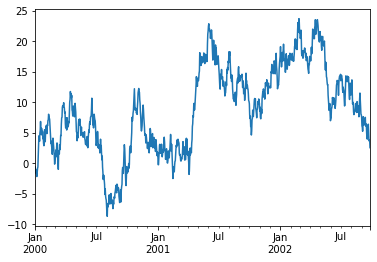

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.close("all")
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under jupyter Notebook, the plot will appear on plot(). Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.

In [80]:
plt.show();

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

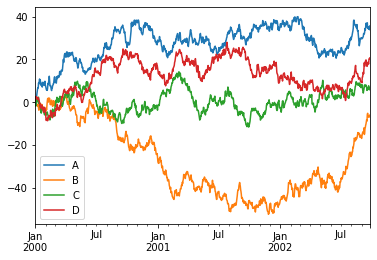

In [83]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A","B","C","D"]
    )
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data
### CSV
Writing to csv file: using DataFrame.to_csv()

In [84]:
df.to_csv("foo.csv")

Reading from a csv file: using read_csv()

In [85]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.863206,1.513269,-0.190582,1.081075
1,2000-01-02,0.398086,0.842046,-1.227223,1.914484
2,2000-01-03,0.956428,-0.107133,-1.832941,2.516341
3,2000-01-04,1.446316,-0.621789,-0.368696,2.304483
4,2000-01-05,2.736500,-0.587041,0.545398,2.605872
...,...,...,...,...,...
995,2002-09-22,34.066775,-6.658037,7.658794,17.889551
996,2002-09-23,35.073701,-6.996401,6.129618,20.134428
997,2002-09-24,35.179890,-6.436107,5.789522,20.071461
998,2002-09-25,33.867077,-6.705999,6.535113,20.720120


### HDF5
Reading and writing to HDFStores.
Writing to a HDF5 Store using DataFrame.to_hdf():

In [86]:
df.to_hdf("foo.h5","df")

Reading from a HDF5 Store using read_hdf():

In [87]:
pd.read_hdf("foo.h5","df")

,A,B,C,D
2000-01-01,0.863206,1.513269,-0.190582,1.081075
2000-01-02,0.398086,0.842046,-1.227223,1.914484
2000-01-03,0.956428,-0.107133,-1.832941,2.516341
2000-01-04,1.446316,-0.621789,-0.368696,2.304483
2000-01-05,2.736500,-0.587041,0.545398,2.605872
...,...,...,...,...
2002-09-22,34.066775,-6.658037,7.658794,17.889551
2002-09-23,35.073701,-6.996401,6.129618,20.134428
2002-09-24,35.179890,-6.436107,5.789522,20.071461
2002-09-25,33.867077,-6.705999,6.535113,20.720120


### Excel
Reading and writing to Excel.
Writing to an excel file using DataFrame.to_excel():

In [88]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using read_excel():

In [89]:
pd.read_excel("foo.xlsx","Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.863206,1.513269,-0.190582,1.081075
1,2000-01-02,0.398086,0.842046,-1.227223,1.914484
2,2000-01-03,0.956428,-0.107133,-1.832941,2.516341
3,2000-01-04,1.446316,-0.621789,-0.368696,2.304483
4,2000-01-05,2.736500,-0.587041,0.545398,2.605872
...,...,...,...,...,...
995,2002-09-22,34.066775,-6.658037,7.658794,17.889551
996,2002-09-23,35.073701,-6.996401,6.129618,20.134428
997,2002-09-24,35.179890,-6.436107,5.789522,20.071461
998,2002-09-25,33.867077,-6.705999,6.535113,20.720120


## Gotchas
If you are attempting to perform a boolean operation on a Series or DataFrame you might see an exception like:

In [90]:
if pd.Series([False, True, False]):
  print("I was true")

ValueError: ignored

See Comparisons and Gotchas for an explanation and what to do.